In [3]:
#NN
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print("Shape of x_train =",x_train.shape)
print("Shape of y_train =",y_train.shape)
print("Shape of x_test =",x_test.shape)
print("Shape of y_test =",y_test.shape)

Shape of x_train = (60000, 28, 28)
Shape of y_train = (60000,)
Shape of x_test = (10000, 28, 28)
Shape of y_test = (10000,)


5


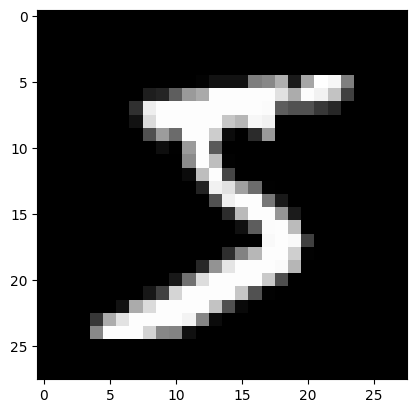

In [6]:
plt.imshow(x_train[0],cmap='gray')
print(y_train[0])

(array([[28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [26.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [26.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.],
        [26.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.],
        [24.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.],
        [21.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  3.,  2.],
        [20.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  4.],
        [20.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  4.],
        [18.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,  0.,  6.],
        [15.,  2.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  7.],
        [15.,  0.,  0.,  2.,  0.,  1.,  0.,  2.,  1.,  7.],
        [16.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,  2.,  5.],
        [18.,  0.,  0.,  0.,  0.,  1.,  1.,  3.,  0.,  5.],
        [15.,  1.,  0.,  2.,  2.,  0.,  

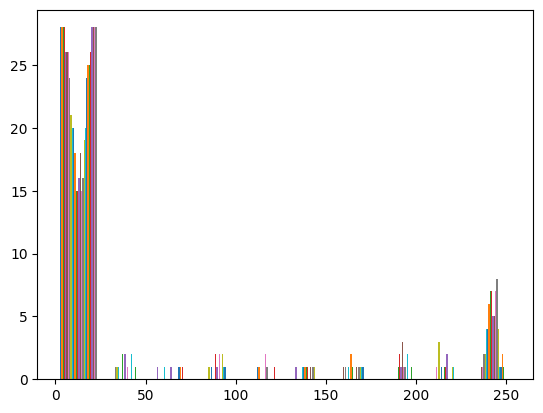

In [7]:
plt.hist(x_train[0])

In [8]:
x_train_r=x_train.reshape(60000,784)  #28*28=784
x_test_r=x_test.reshape(10000,784)
#Normlaization
x_train_n=x_train_r/255
x_test_n=x_test_r/255

In [9]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
y_train_cat=to_categorical(y_train ,10)
y_test_cat=to_categorical(y_test,10)

In [46]:
model=Sequential()
model.add(Dense(4,activation='sigmoid',input_shape=(784,)))
model.add(Dense(5,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [47]:
history=model.fit(x_train_n,y_train_cat,epochs=10,batch_size=2 ,validation_split=0.2 )


Epoch 1/10
23978/24000 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4526 - loss: 1.6318

KeyboardInterrupt: 

In [39]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

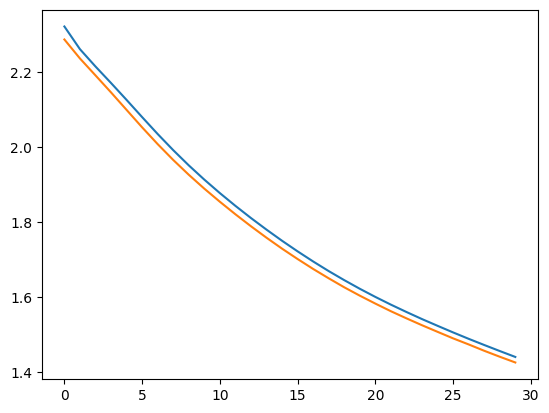

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

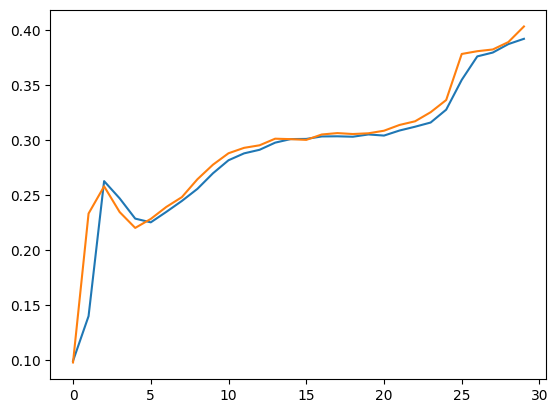

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [15]:
model.evaluate(x_test_n,y_test_cat)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6149 - loss: 1.2960


[1.2750365734100342, 0.6223999857902527]

4


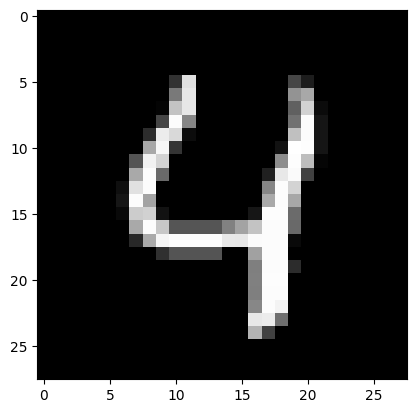

In [42]:
plt.imshow(x_test[4],cmap='gray')
print(y_test[4])

In [17]:
np.argmax(model.predict(x_test_n[4:5]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


np.int64(9)

In [18]:
y_pred=model.predict(x_test_n)
#y_pred_labels=[np.argmax(i) for i in y_pred]
y_pred_labels=np.argmax(y_pred,axis=1)
y_pred_labels

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([7, 2, 1, ..., 9, 8, 6])

In [19]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_labels)
cm

array([[ 162,    1,   17,    2,    0,    1,  759,    6,   32,    0],
       [   2, 1074,    3,   41,    0,    2,    2,    2,    8,    1],
       [  16,    1,  902,   18,    3,    0,   37,   17,   33,    5],
       [   9,   18,   33,  892,    0,    3,   13,   16,   25,    1],
       [   0,   39,    9,    1,   95,    1,   23,  118,    1,  695],
       [  30,   12,   14,  258,    7,    4,   40,   11,  510,    6],
       [  47,    2,   24,    2,    8,    0,  845,   14,   15,    1],
       [   0,   31,   51,    3,    6,    0,    2,  822,    0,  113],
       [  49,   27,    9,  133,    3,   10,   44,    7,  686,    6],
       [   1,   72,    3,   18,   46,    1,   16,  106,    4,  742]])

<Axes: >

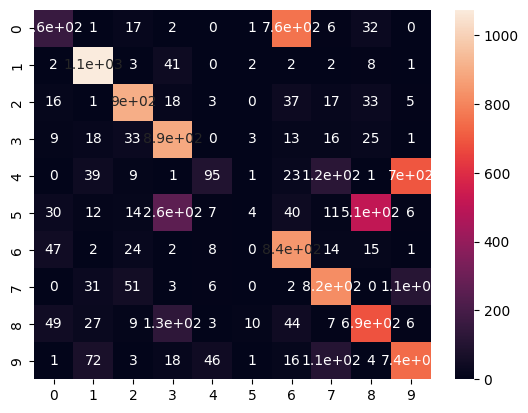

In [21]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [48]:
model.save("mymodel.h5")

In [1]:
#NN
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) =cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


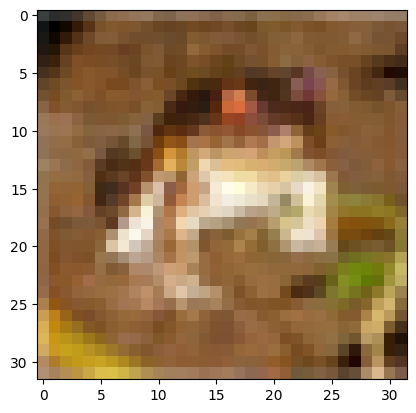

In [3]:
plt.imshow(x_train[0])

In [4]:
x_train_r=x_train.reshape(50000,3072)  #32*32*3=3072
x_test_r=x_test.reshape(10000,3072)
#Normlaization
x_train_n=x_train_r/255
x_test_n=x_test_r/255
y_train_cat=to_categorical(y_train ,10)
y_test_cat=to_categorical(y_test,10)

In [6]:
model=Sequential()
model.add(Dense(128,activation='sigmoid',input_shape=(3072,)))
model.add(Dense(128,activation='sigmoid'))
model.add(Dense(128,activation='sigmoid'))
model.add(Dense(128,activation='sigmoid'))
model.add(Dense(128,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 460,682 (1.76 MB)

 Trainable params: 460,682 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.fit(x_train_n,y_train_cat,epochs=10,batch_size=50 ,validation_split=0.2 )

Epoch 1/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1496 - loss: 2.1875 - val_accuracy: 0.1849 - val_loss: 2.0800
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1900 - loss: 2.0432 - val_accuracy: 0.1866 - val_loss: 2.0383
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1982 - loss: 2.0152 - val_accuracy: 0.1994 - val_loss: 2.0232
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2292 - loss: 1.9737 - val_accuracy: 0.2583 - val_loss: 1.9108
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2819 - loss: 1.8926 - val_accuracy: 0.2828 - val_loss: 1.9036
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2970 - loss: 1.8672 - val_accuracy: 0.2909 - val_loss: 1.8913
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3097 - loss: 1.8471 - val_accuracy: 0.3095 - val_loss: 1.8409
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3305 - loss: 1.8082 - val_accuracy: 0.

In [9]:
## CNN
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Sequential
from tensorflow.keras.layers import Dense ,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10


In [10]:
(x_train, y_train), (x_test, y_test) =cifar10.load_data()

In [11]:
x_train_n=x_train/255
x_test_n=x_test/255
y_train_cat=to_categorical(y_train ,10)
y_test_cat=to_categorical(y_test,10)

In [17]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='sigmoid'))
model.add(Dense(128,activation='sigmoid'))
model.add(Dense(128,activation='sigmoid'))
model.add(Dense(128,activation='sigmoid'))
model.add(Dense(128,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 381,770 (1.46 MB)

 Trainable params: 381,770 (1.46 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history=model.fit(x_train_n,y_train_cat,epochs=10,batch_size=50 ,validation_split=0.2 )

Epoch 1/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1567 - loss: 2.1215 - val_accuracy: 0.3002 - val_loss: 1.7871
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3507 - loss: 1.6582 - val_accuracy: 0.4529 - val_loss: 1.4430
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4734 - loss: 1.4000 - val_accuracy: 0.5275 - val_loss: 1.2970
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5441 - loss: 1.2253 - val_accuracy: 0.5613 - val_loss: 1.1948
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5880 - loss: 1.1045 - val_accuracy: 0.5977 - val_loss: 1.1105
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6397 - loss: 0.9863 - val_accuracy: 0.6047 - val_loss: 1.1400
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6727 - loss: 0.9035 - val_accuracy: 0.6341 - val_loss: 1.0523
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7128 - loss: 0.8133 - val_accuracy: 0

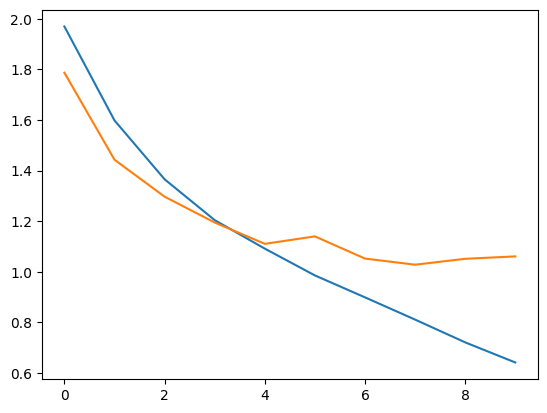

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

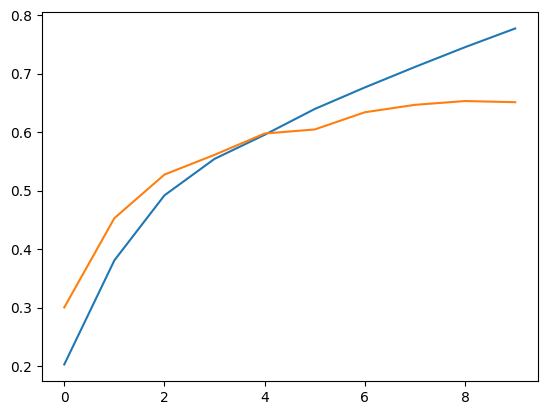

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])